#### I have tried K- means clustering on the wine dataset. k-means is an unsupervised machine learning algorithm used to find groups of observations (clusters) that share similar characteristics.
It means that the observations given in the data set are unlabeled, there is no outcome to be predicted.

This data set contains the results of a chemical analysis of wines grown in a specific area of Italy.

#### impporting the necessary libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading the dataset

In [36]:
data = pd.read_csv("C:\Users\Namrata\Desktop\misc_udacity\Python-Data-Science-and-Machine-Learning-Bootcamp\Python-Data-Science-and-Machine-Learning-Bootcamp\wine.xls")

In [37]:
data.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [38]:
data.shape

(178, 14)

##### so we see that the last column is customer_segment which is a labeled data and we know K-means works with unlabeled data , we are going to remove the last column

In [39]:
df = data.drop(['Customer_Segment'],axis = 1)
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


##### So above is our new dataset without the undesired column

### Data Analysis 

In [40]:
df.shape

(178, 13)

In [41]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(2)
memory usage: 18.1 KB


#### We also see that we do not have null values in my dataset

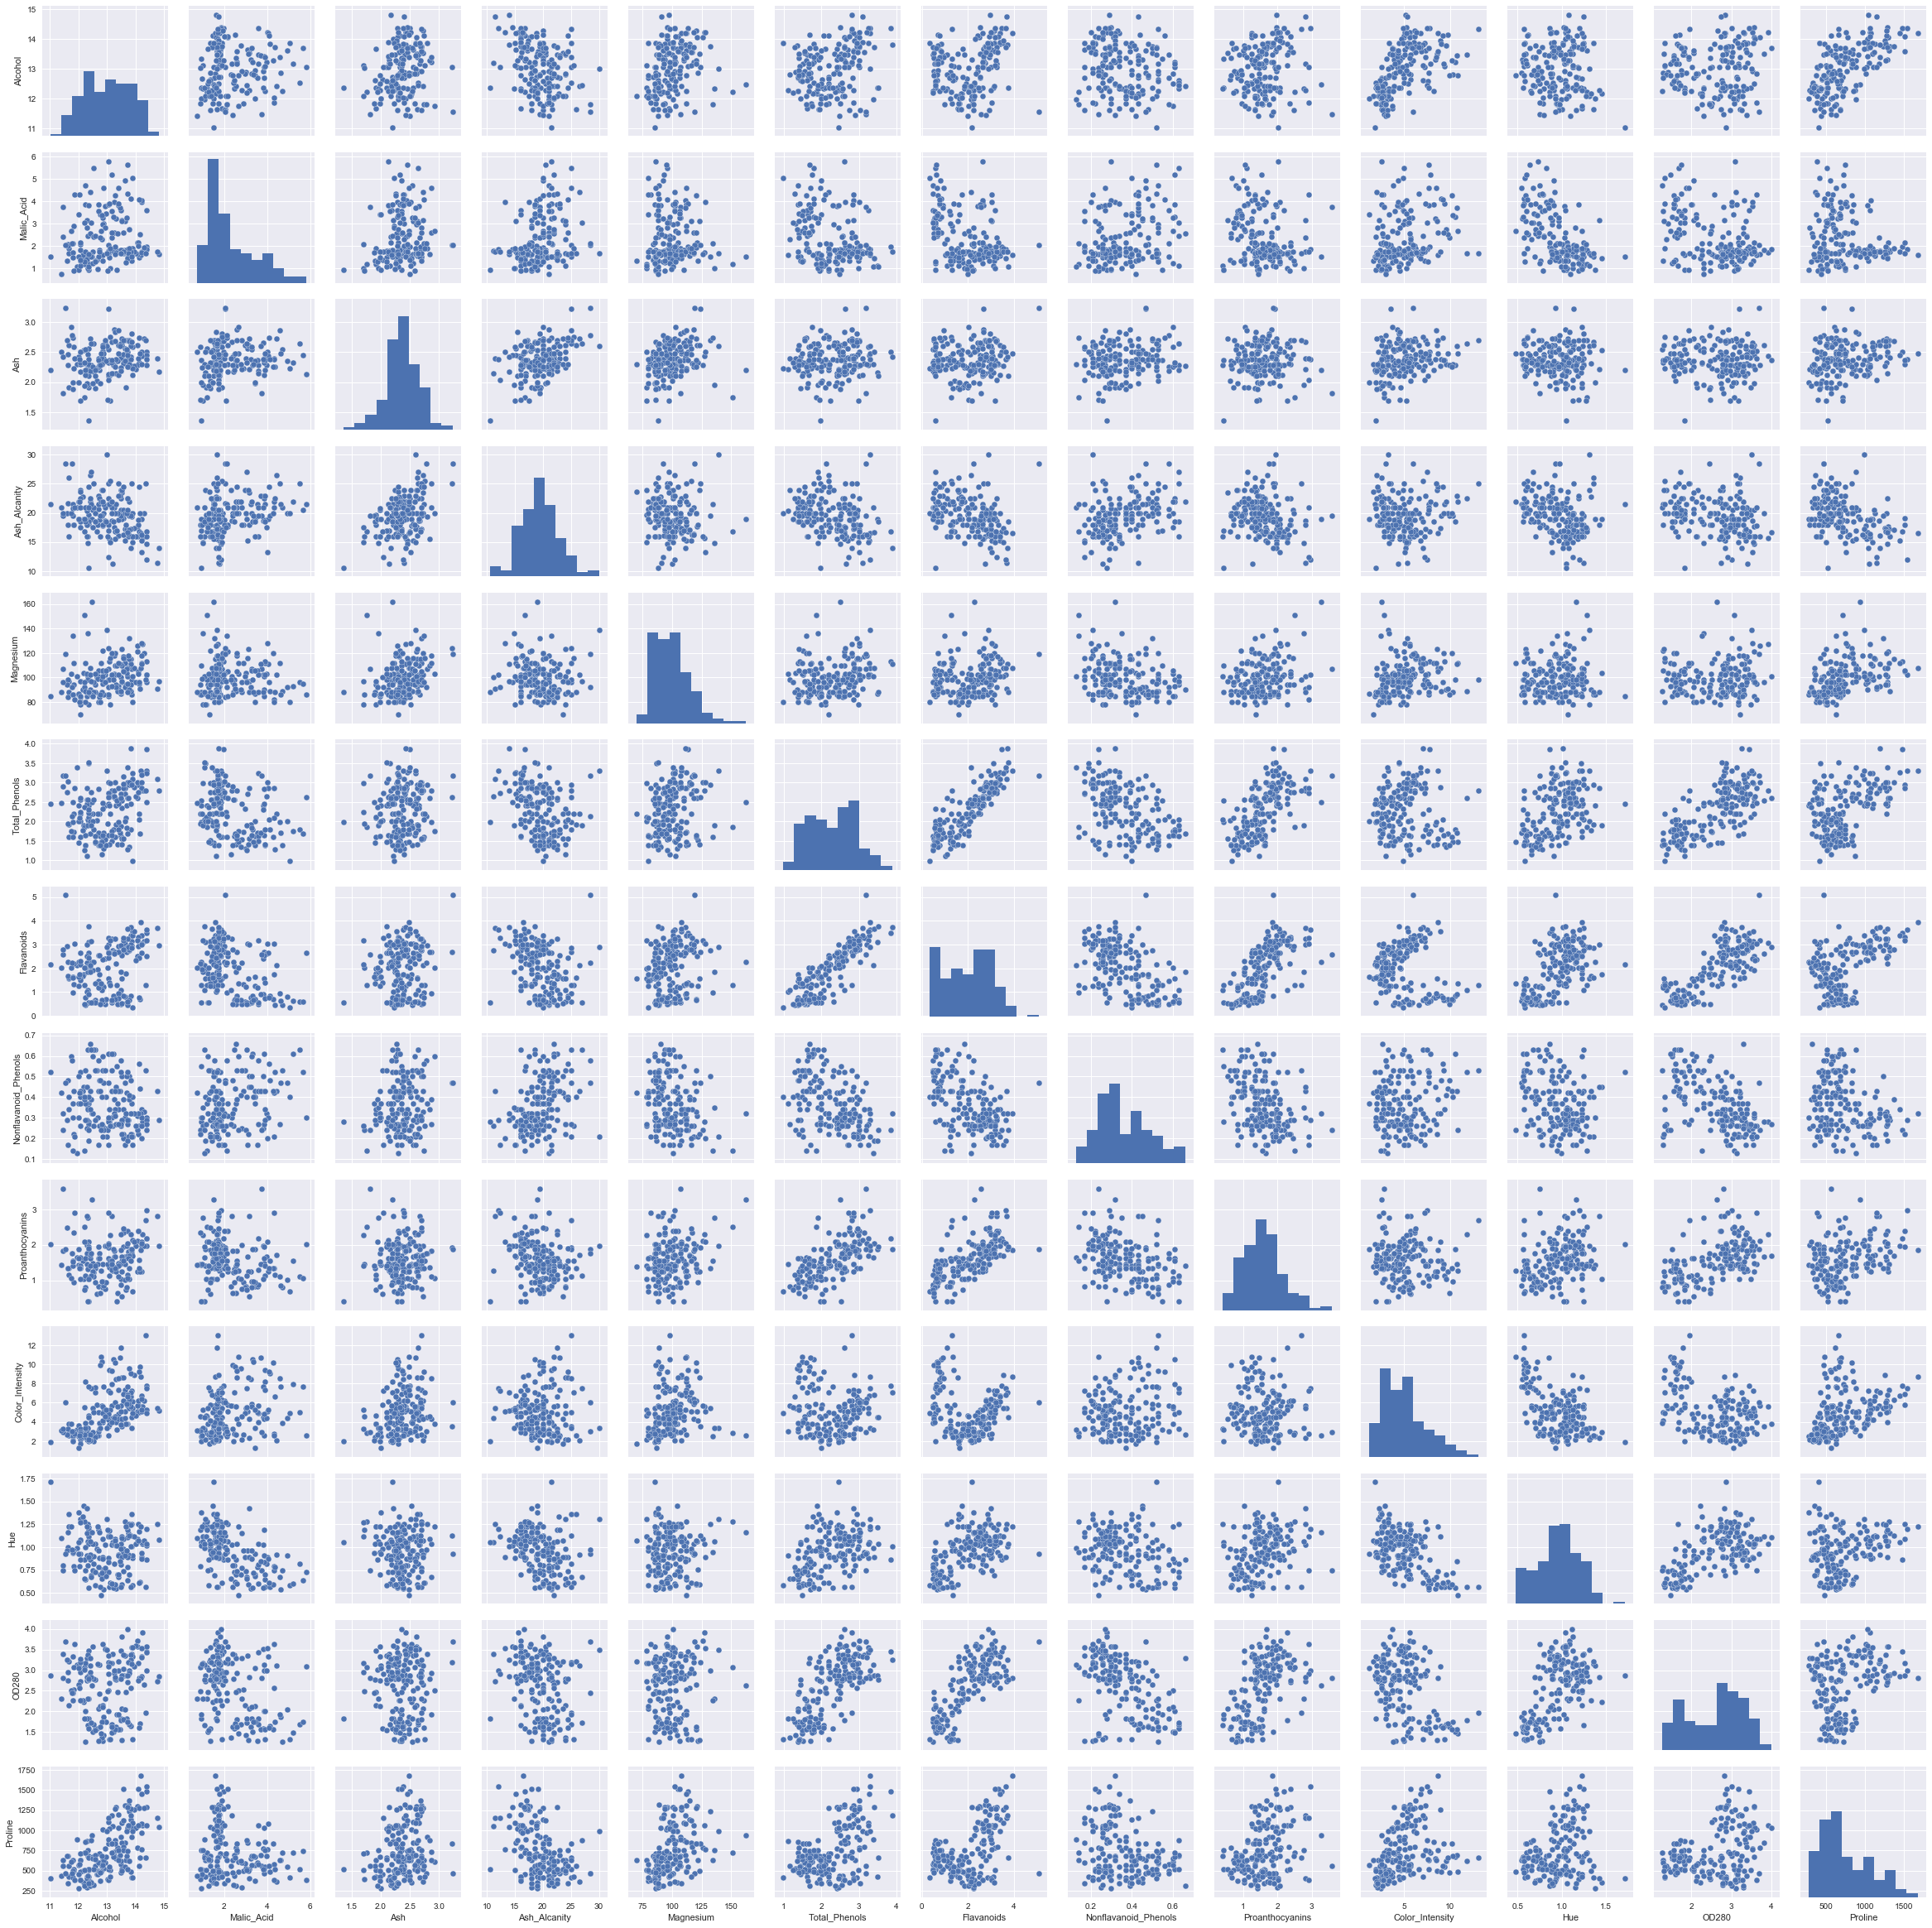

In [43]:
sns.pairplot(data=df)

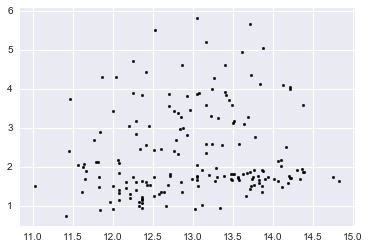

In [44]:
x1= df[df.columns[0]]
#x1
y1=df[df.columns[1]]
#plt.scatter(x1, y1,alpha=0.5)
#plt.show()


X = np.array(list(zip(x1, y1)))
plt.scatter(x1, y1, c='black', s=7)


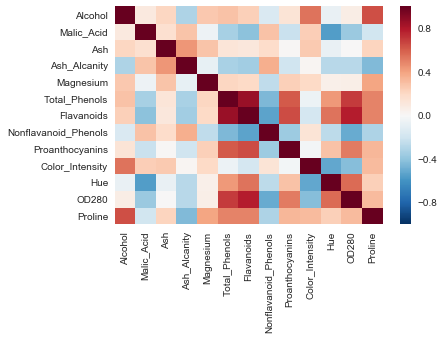

In [45]:
import seaborn as sns
sns.heatmap(df.corr())

#### So from the above heatmap,we can see that there is a strong relationship between 'Flavanoids' and 'Total_Phenols'. So lets now visualize the linear relationship between the two using an lm plot

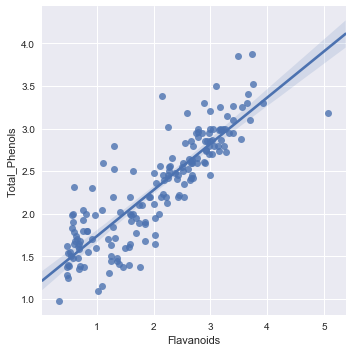

In [46]:
sns.lmplot(x='Flavanoids',y='Total_Phenols',data=df)

In [47]:
cluster = df[['Alcohol','Total_Phenols', 'Flavanoids']]
cluster

,Alcohol,Total_Phenols,Flavanoids
0,14.23,2.80,3.06
1,13.20,2.65,2.76
2,13.16,2.80,3.24
3,14.37,3.85,3.49
4,13.24,2.80,2.69
5,14.20,3.27,3.39
6,14.39,2.50,2.52
7,14.06,2.60,2.51
8,14.83,2.80,2.98
9,13.86,2.98,3.15


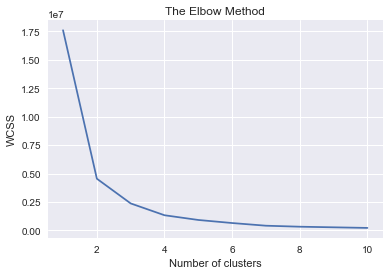

In [48]:
# Using the elbow method to find  the optimal number of clusters using the unscaled dataset
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Data Preparation

#### First of all we need to normalize our data that means to adjust the values measured on different scales to a common scale

In [49]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [50]:
#x = df.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#df2 = pd.DataFrame(x_scaled)
df2 = cluster.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 0)


In [51]:
df2.head()

,Alcohol,Total_Phenols,Flavanoids
0,0.842105,0.627586,0.573840
1,0.571053,0.575862,0.510549
2,0.560526,0.627586,0.611814
3,0.878947,0.989655,0.664557
4,0.581579,0.627586,0.495781


In [52]:
df2.shape

(178, 3)

#### Finding optimal number of clusters for the scaled data(df2)

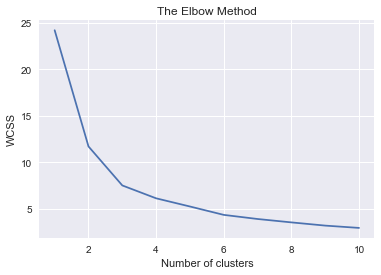

In [53]:
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


#### It is good to go with 5 clusters

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(df2)
#kmeans.labels_

In [55]:
centroids = kmeans.cluster_centers_
#centroids

In [56]:
import copy
labels = kmeans.predict(df2)

In [57]:
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.graph_objs import *
import seaborn as sns

In [58]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [59]:
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(df2)
df2['cluster']=y_kmeans

In [61]:
trace1 = go.Scatter3d(
    x = df2['Alcohol'].values,
    y = df2['Total_Phenols'].values,
    z = df2['Flavanoids'].values,
    mode='markers',
    marker=dict(
        size=12,
        color=df2['cluster'].values,# set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
    
)
df3 = [trace1]
layout = go.Layout(
    scene=Scene(
        xaxis=XAxis(title='Alcohol'),
        yaxis=YAxis(title='Total_Phenols'),
        zaxis=ZAxis(title='Flavanoids')
        ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
)

fig = go.Figure(data=df3, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')